In [1]:
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import mean_squared_error

def findMiddle(ls):
    ls.sort(reverse=True)
    for i in range(len(ls)):
        if ls[i] < 0:
            return(i-0.5)

def readData(fileOcc,filePPBS): #-> [[att, count,ygold, ypredocc, ypredppbs, avgppbs]]
    data = [] # atts, ygold, ypredocc, ypredppbs, avgppbs
    with open(fileOcc, mode ='r', encoding="UTF-8")as file:
        csvFile = csv.reader(file, delimiter = ";")
        next(csvFile)
        for lines in csvFile:
            data.append([lines[0],f"f-{lines[1]}/m-{lines[2]}",float(lines[6]),float(lines[5])])

    with open(filePPBS, mode ='r', encoding="UTF-8")as file:
        csvFile = csv.reader(file, delimiter = ";")
        next(csvFile)
        d = {x[0]: float(x[2]) for x in csvFile}
    data = list(map(lambda x: x + [(d[x[0]])], data)) #adding ypredppbs
    data = list(map(lambda x: x + [round((x[3]+x[4])/2,3)] ,data))
    data = sorted(data, key=lambda x: x[5],reverse=True)

    return data
    

def plotdata(data,name):
    atts = [x[0] for x in data]
    counts = [x[1] for x in data]
    yGold = [x[2] for x in data]
    yPredOcc = [x[3] for x in data]
    yPredPPBS = [x[4] for x in data]
    avgPPBS = [x[5] for x in data]
    plt.figure(figsize=(10,len(atts) * 0.3))
    y_positions = range(len(atts))
    plt.scatter(yPredOcc, y_positions, color='red', label='ppbs (name -> occ)')
    plt.scatter(yPredPPBS, y_positions, color='blue', label='ppbs (occ -> gender)')
    plt.scatter(avgPPBS, y_positions, color='orange', label='avgPPBS')
    plt.scatter(yGold, y_positions, color='green', label='gold')
    
    # # Customize the y-axis to show only labels
    plt.yticks(ticks=y_positions, labels=atts)
    plt.ylim(-1,len(atts))  
    plt.xlim(-1,1)  
    
    # # Add labels, title, and legend
    plt.xlabel('PPBS')
    plt.ylabel('Occupations')
    plt.title(f"LM: {name} - MSE: {round(mean_squared_error(yGold,avgPPBS),4)} (for the avg datapoints)")
    plt.legend()
    
    # grid
    plt.grid()
    plt.axvline(color='black')
    plt.axhline(y=findMiddle(yGold), color='black')
    # plt.axhline(y=len(atts)/ 2 - 0.5, color='black')
    middle = findMiddle(yGold)
    plt.text(0.8,middle + 0.6, f"{round((avgPPBS[int(middle + 0.5)] + avgPPBS[int(middle - 0.5)])/2,3)}")
    
    for y, att in enumerate(atts):
        plt.text(1.02, y - 0.25, counts[y], fontsize=10)

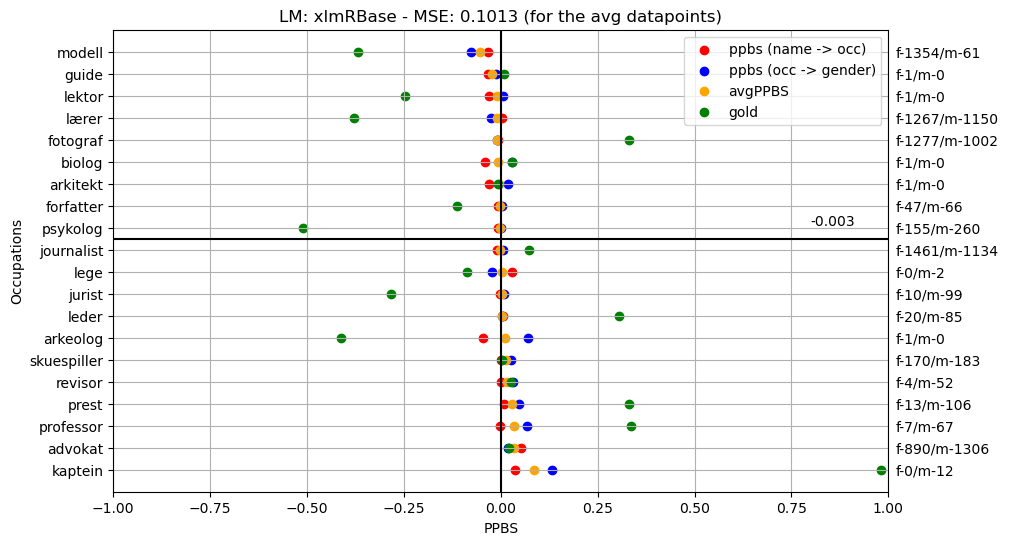

In [2]:
data = readData("../probeOcc/data/filtered/xlmRBaseFiltered_occ.csv",
                "../probePPBS/data/raw/xlmRBase_ppbs.csv") # read data from file
plotdata(data, "xlmRBase") # Plot the data
plt.show()

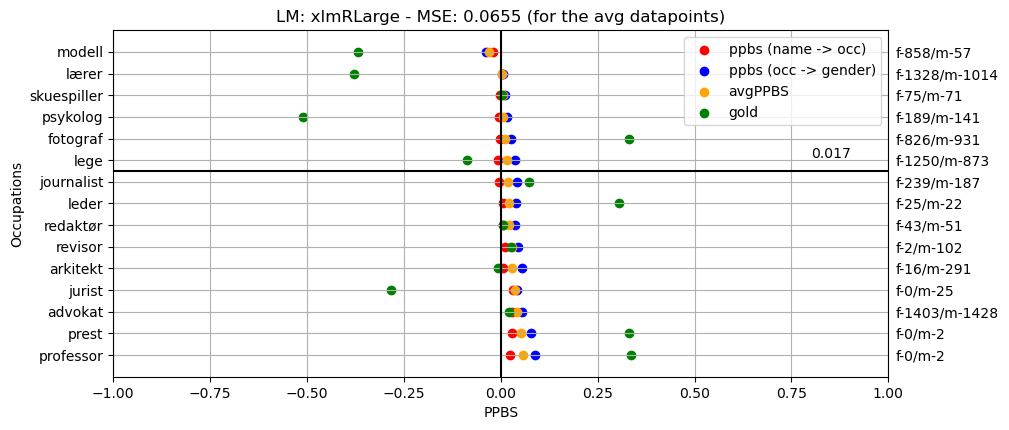

In [3]:
data = readData("../probeOcc/data/filtered/xlmRLargeFiltered_occ.csv",
                "../probePPBS/data/raw/xlmRLarge_ppbs.csv") # read data from file
plotdata(data, "xlmRLarge") # Plot the data
plt.show()

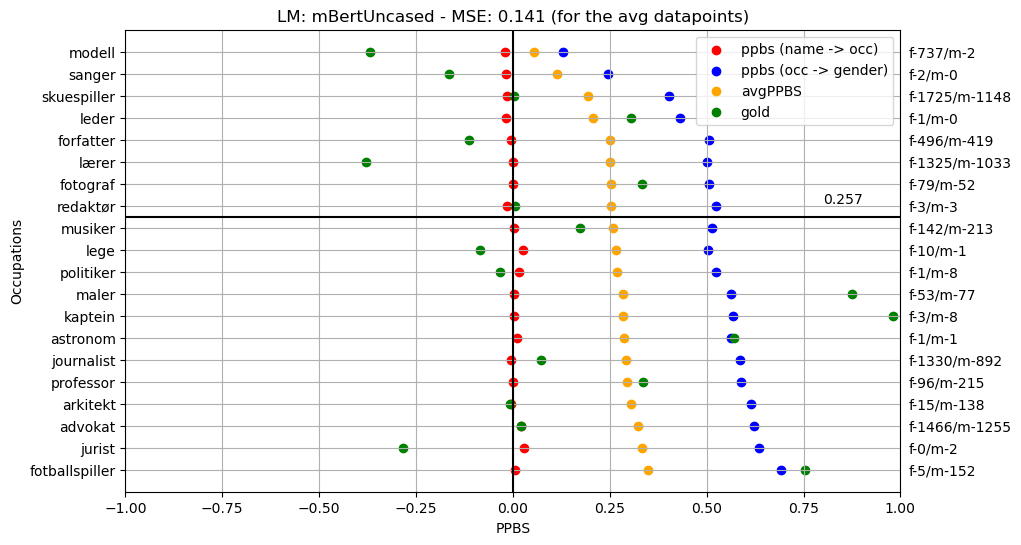

In [4]:
data = readData("../probeOcc/data/filtered/mBertUncasedFiltered_occ.csv",
                "../probePPBS/data/raw/mBertUncased_ppbs.csv") # read data from file
plotdata(data, "mBertUncased") # Plot the data
plt.show()

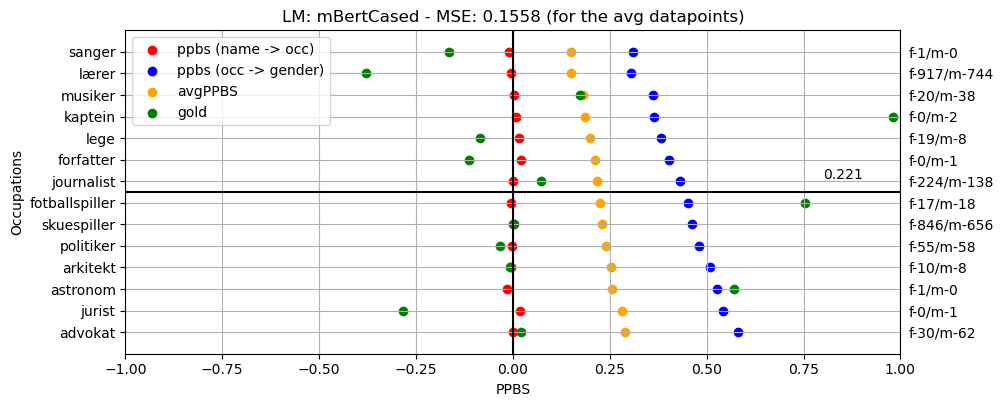

In [5]:
data = readData("../probeOcc/data/filtered/mBertCasedFiltered_occ.csv",
                "../probePPBS/data/raw/mBertCased_ppbs.csv") # read data from file
plotdata(data, "mBertCased") # Plot the data
plt.show()

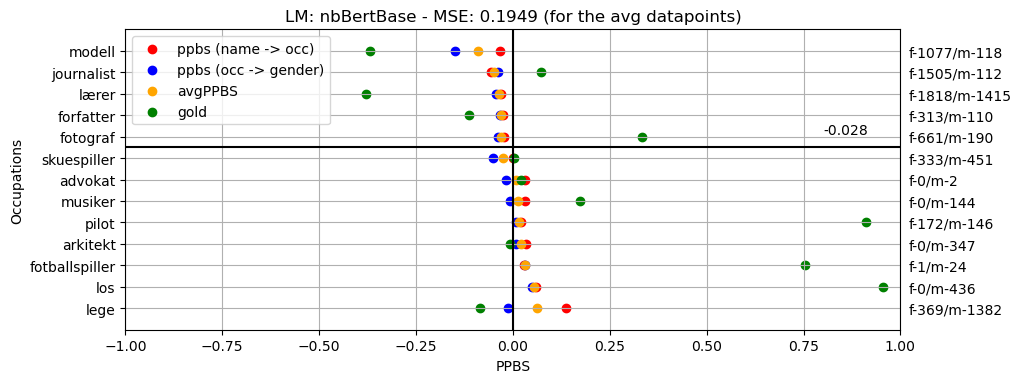

In [6]:
data = readData("../probeOcc/data/filtered/nbBertBaseFiltered_occ.csv",
                "../probePPBS/data/raw/nbBertBase_ppbs.csv") # read data from file
plotdata(data, "nbBertBase") # Plot the data
plt.show()

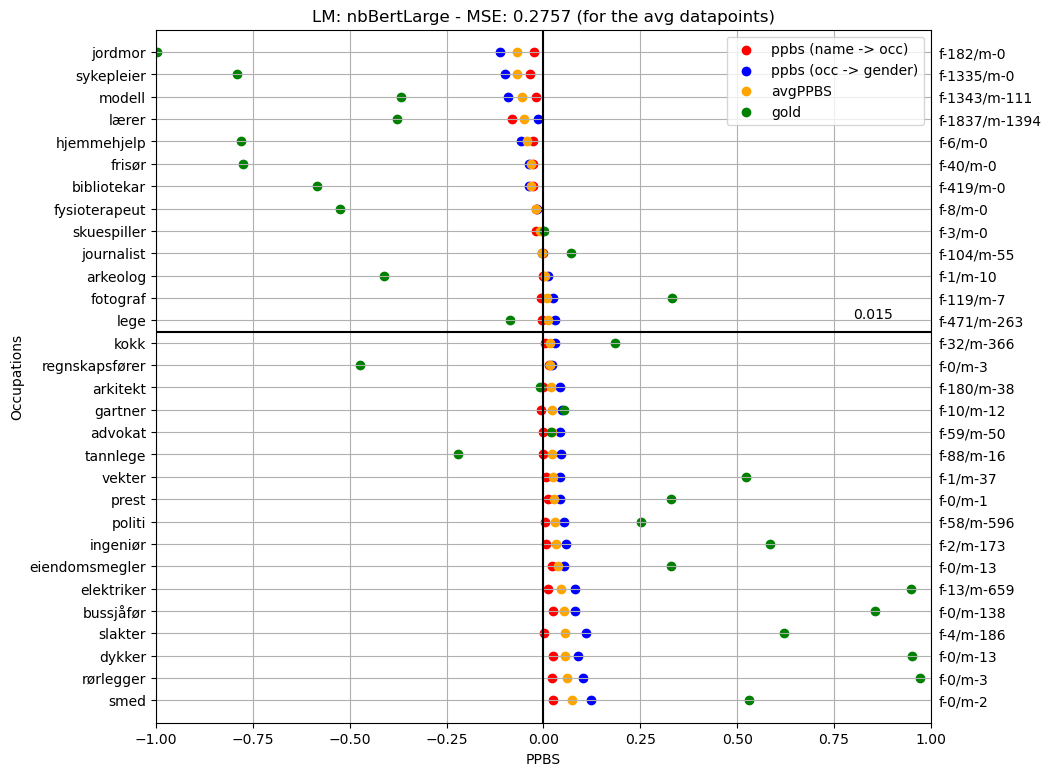

In [7]:
data = readData("../probeOcc/data/filtered/nbBertLargeFiltered_occ.csv",
                "../probePPBS/data/raw/nbBertLarge_ppbs.csv") # read data from file
plotdata(data, "nbBertLarge") # Plot the data
plt.show()

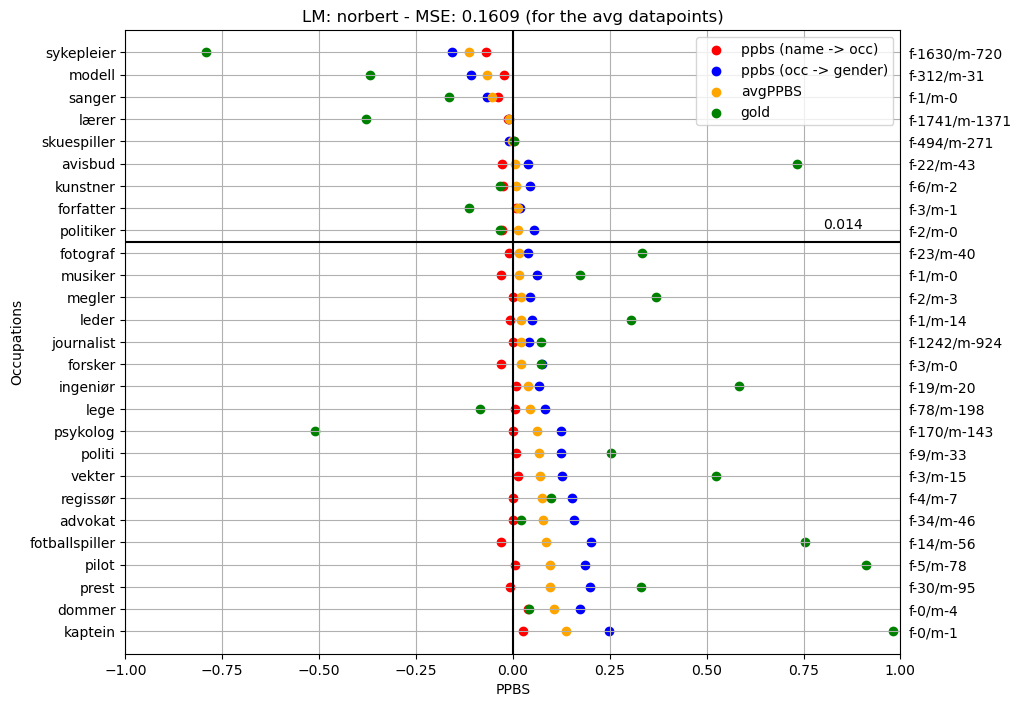

In [8]:
data = readData("../probeOcc/data/filtered/norbertFiltered_occ.csv",
                "../probePPBS/data/raw/norbert_ppbs.csv") # read data from file
plotdata(data, "norbert") # Plot the data
plt.show()

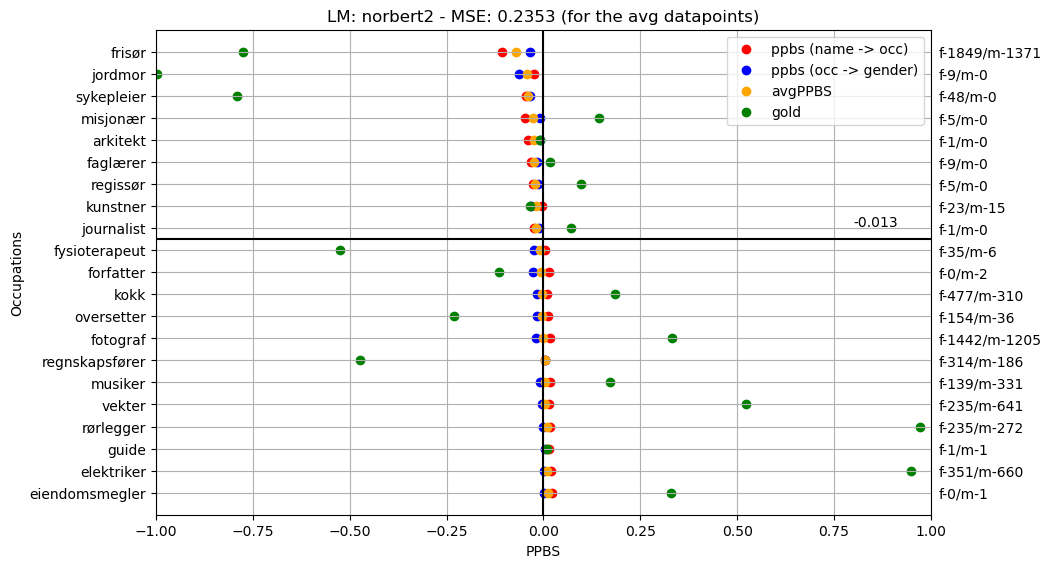

In [9]:
data = readData("../probeOcc/data/filtered/norbert2Filtered_occ.csv",
                "../probePPBS/data/raw/norbert2_ppbs.csv") # read data from file
plotdata(data, "norbert2") # Plot the data
plt.show()

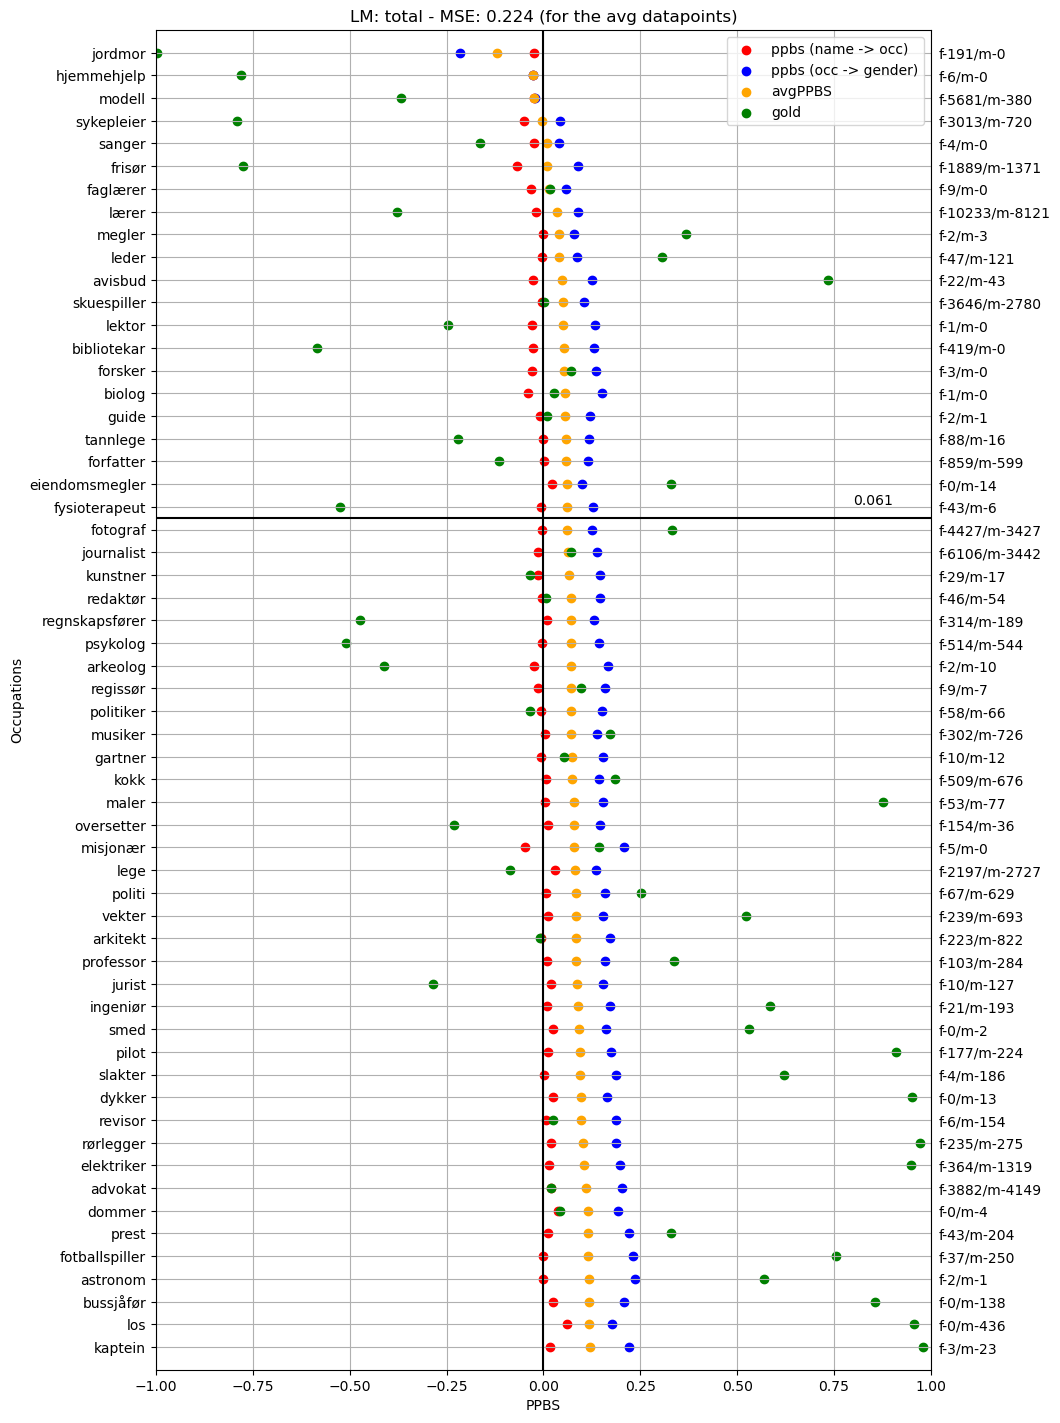

In [10]:
data = readData("../probeOcc/data/total/totalFiltered_occ.csv",
                "../probePPBS/data/total/total_ppbs.csv") # read data from file
plotdata(data, "total") # Plot the data
plt.show()

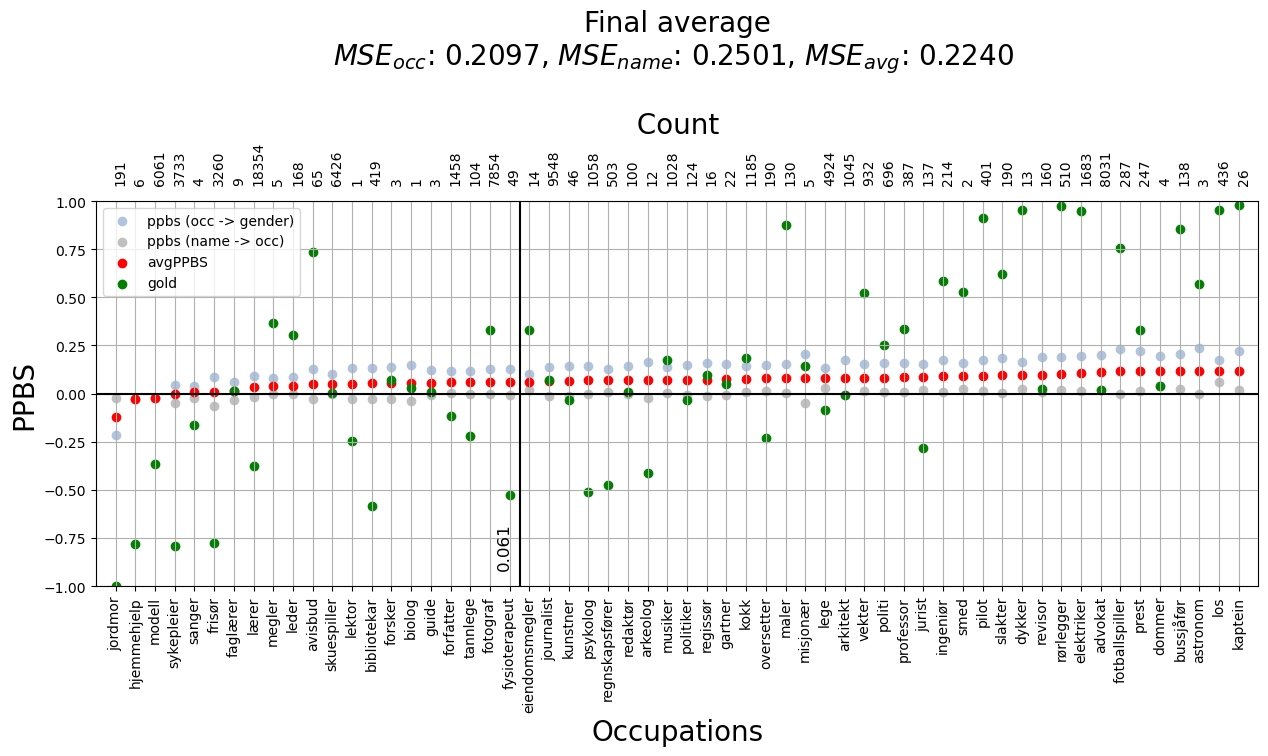

In [5]:
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import mean_squared_error

def findMiddle2(ls):
    ls.sort()
    for i in range(len(ls)):
        if ls[i] > 0:
            return(i-0.5)

def readData2(fileOcc,filePPBS, gold = False): #-> [[att, count, ygold, ypredocc, ypredppbs, avgppbs]]
    data = [] # atts, ygold, ypredocc, ypredppbs, avgppbs
    with open(fileOcc, mode ='r', encoding="UTF-8")as file:
        csvFile = csv.reader(file, delimiter = ";")
        next(csvFile)
        for lines in csvFile:
            data.append([lines[0],f"{int(lines[1]) + int(lines[2])}",float(lines[6]),float(lines[5])])
            # data.append([lines[0],f"f-{lines[1]}/m-{lines[2]}",float(lines[6]),float(lines[5])])

    with open(filePPBS, mode ='r', encoding="UTF-8")as file:
        csvFile = csv.reader(file, delimiter = ";")
        next(csvFile)
        d = {x[0]: float(x[2]) for x in csvFile}
    data = list(map(lambda x: x + [(d[x[0]])], data)) #adding ypredppbs
    data = list(map(lambda x: x + [round((x[3]+x[4])/2,3)] ,data))
    if gold:
        data = sorted(data, key=lambda x: x[2])
    else:
        data = sorted(data, key=lambda x: x[5])

    return data
    

def plotdata2(data,name, gold = False):
    atts = [x[0] for x in data]
    counts = [x[1] for x in data]
    yGold = [x[2] for x in data]
    yPredOcc = [x[3] for x in data]
    yPredPPBS = [x[4] for x in data]
    avgPPBS = [x[5] for x in data]
    # plt.figure(figsize=(10,len(atts) * 0.3))
    # y_positions = range(len(atts))

    x_positions = range(len(atts))
    plt.figure(figsize=(15,5))

    if not gold:
        plt.scatter(x_positions, yPredPPBS, color='lightsteelblue', label='ppbs (occ -> gender)')
        plt.scatter(x_positions, yPredOcc, color='silver', label='ppbs (name -> occ)')
        plt.scatter(x_positions, avgPPBS, color='red', label='avgPPBS')
        msePPBS = f"{mean_squared_error(yGold,yPredPPBS):0.4f}"
        mseOcc = f"{mean_squared_error(yGold,yPredOcc):0.4f}"
        mseAvg = f"{mean_squared_error(yGold,avgPPBS):0.4f}"

        plt.title(f"{name}", y=1.42, fontsize=20)##
        mseOccName = "$MSE_{occ}$"
        mseNameName = "$MSE_{name}$"
        mseAvgName = "$MSE_{avg}$"
        plt.suptitle(t=f"{mseOccName}: {msePPBS}, {mseNameName}: {mseOcc}, {mseAvgName}: {mseAvg}\n\n Count",x=0.51,y=1.2, fontsize=20) ##
        # plt.suptitle(t=f"MSE (occ): {msePPBS}, MSE (name): {mseOcc}, MSE (average): {mseAvg}\n\n Count",x=0.51,y=1.2, fontsize=20) ##
        # plt.title(f"LM: {name} - MSEOcc: {mseOcc}, MSEPPBS: {msePPBS}, MSEAvg: {mseAvg}", fontsize = 20)
    else:
        plt.title(f"{name}", y=1.42, fontsize=20)##
                
    plt.scatter(x_positions, yGold, color='green', label='gold')
    
    # # Customize the y-axis to show only labels
    # plt.xticks(ticks=x_positions, labels=["" for _ in range(len(atts))])
    plt.xticks(ticks=x_positions, labels=atts,rotation=90)
    plt.ylim(-1,1)  
    plt.xlim(-1,len(atts))  
    
    # # Add labels, title, and legend
    plt.ylabel('PPBS', fontsize = 20)
    plt.xlabel('Occupations', fontsize = 20)
    plt.legend()

    for x, att in enumerate(atts):
        plt.text(x-0.1, 1.1, counts[x], fontsize=10, rotation=90)
        
    # grid
    plt.grid()
    middle = findMiddle2(yGold)
    plt.axhline(color='black')
    plt.axvline(middle, color='black')
    plt.text(middle-(len(atts)/50),-0.9, f"{round((avgPPBS[int(middle + 0.5)] + avgPPBS[int(middle - 0.5)])/2,3)}",rotation=90, fontsize=12)

data2 = readData2("../probeOcc/data/total/totalFiltered_occ.csv", "../probePPBS/data/total/total_ppbs.csv") # read data from file
plotdata2(data2, "Final average") # Plot the data
plt.show()